In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from arch import arch_model


Bad key text.latex.preview in file C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

# Return Forecasting: Read Historical Daily Yen Futures Data
In this notebook, you will load historical Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

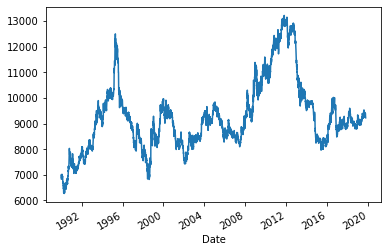

In [4]:
# Plot just the "Settle" column from the dataframe:
yen_futures.Settle.plot()

df=yen_futures

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

<AxesSubplot:xlabel='Date'>

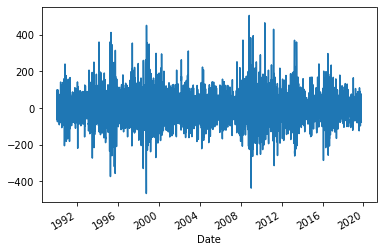

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
yen_futures, yen_trend = sm.tsa.filters.hpfilter(df["Settle"])
yen_futures.plot()

#Example 10.1 or10.5

<AxesSubplot:xlabel='Date'>

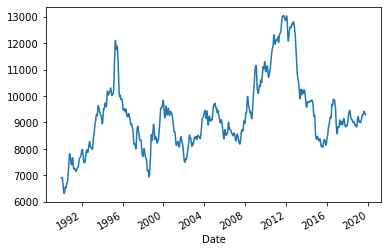

In [6]:
yen_trend.plot()

In [7]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
df.groupby(['Settle']).count()

,Open,High,Low,Last,Change,Volume,Previous Day Open Interest
Settle,,,,,,,
6273.0,1,1,1,1,0,1,1
6287.0,1,1,1,1,0,1,1
6288.0,1,1,1,1,0,1,1
6289.0,1,1,1,1,0,1,1
6293.0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...
13150.0,1,1,1,1,0,1,1
13158.0,1,1,1,1,0,1,1
13175.0,1,1,1,1,0,1,1


<AxesSubplot:xlabel='Date'>

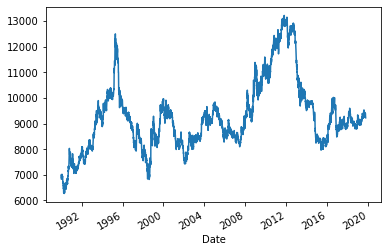

In [8]:
# Plot the Settle Price vs. the Trend for 2015 to the present
df.Settle.plot()


In [9]:
#trend_price.plot()

In [ ]:
# Plot the Settle Noise
# YOUR CODE HERE!

---

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [10]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)

df['Return'] = df['Settle'].pct_change() * 100
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,9775.0,203495.0,196924.0,-0.427829
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502


In [11]:
returns = df.loc[:, 'Return']

<AxesSubplot:xlabel='Date'>

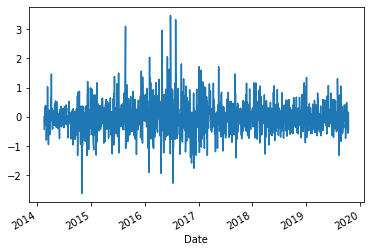

In [12]:
returns.plot()

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
model = ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
results = model.fit()



C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [14]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1415
Model:                     ARMA(2, 1)   Log Likelihood               -1148.679
Method:                       css-mle   S.D. of innovations              0.545
Date:                Thu, 03 Mar 2022   AIC                           2307.359
Time:                        19:46:45   BIC                           2333.633
Sample:                             0   HQIC                          2317.175
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.015     -0.195      0.845      -0.033       0.027
ar.L1.y        0.3023      0.332      0.911      0.362      -0.348       0.952
ar.L2.y        0.0471      0.027      1.775      0.076      -0.005       0.099
ma.L1.y       -0.3155      0.331     -0.952      0.341      -0.965       0.334
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4059           +0.0000j            2.4059            0.0000
AR.2           -8.8199           +0.0000j            8.8199            0.5000
MA.1            3.1697           +0.0000j            3.1697            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Return Forecast'}>

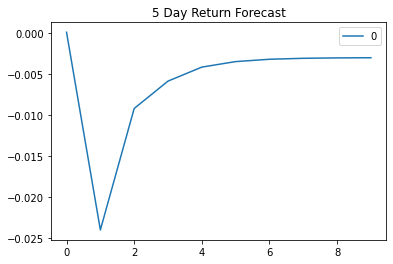

In [15]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="5 Day Return Forecast")


In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1415
Model:                     ARMA(2, 1)   Log Likelihood               -1148.679
Method:                       css-mle   S.D. of innovations              0.545
Date:                Thu, 03 Mar 2022   AIC                           2307.359
Time:                        19:46:52   BIC                           2333.633
Sample:                             0   HQIC                          2317.175
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.015     -0.195      0.845      -0.033       0.027
ar.L1.y        0.3023      0.332      0.911      0.362      -0.348       0.952
ar.L2.y        0.0471      0.027      1.775      0.076      -0.005       0.099
ma.L1.y       -0.3155      0.331     -0.952      0.341      -0.965       0.334
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4059           +0.0000j            2.4059            0.0000
AR.2           -8.8199           +0.0000j            8.8199            0.5000
MA.1            3.1697           +0.0000j            3.1697            0.0000
-----------------------------------------------------------------------------
"""

---

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [17]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(df['Settle'], order=(5, 1, 1))


C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it

In [18]:
# Fit the model
results = model.fit()


In [19]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 1414
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7509.994
Method:                       css-mle   S.D. of innovations             49.020
Date:                Thu, 03 Mar 2022   AIC                          15035.989
Time:                        19:47:06   BIC                          15078.022
Sample:                             1   HQIC                         15051.694
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3898      1.332     -0.293      0.770      -3.001       2.221
ar.L1.D.Settle    -0.5771      0.306     -1.888      0.059      -1.176       0.022
ar.L2.D.Settle     0.0406      0.031      1.311      0.190      -0.020       0.101
ar.L3.D.Settle     0.0626      0.033      1.874      0.061      -0.003       0.128
ar.L4.D.Settle     0.0024      0.032      0.074      0.941      -0.061       0.066
ar.L5.D.Settle    -0.0608      0.028     -2.193      0.028      -0.115      -0.006
ma.L1.D.Settle     0.5658      0.306      1.850      0.064      -0.034       1.165
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3645           -0.0000j            1.3645           -0.5000
AR.2           -0.9382           -1.4304j            1.7107           -0.3424
AR.3           -0.9382           +1.4304j            1.7107            0.3424
AR.4            1.6404           -1.1940j            2.0289           -0.1001
AR.5            1.6404           +1.1940j            2.0289            0.1001
MA.1           -1.7674           +0.0000j            1.7674            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Price Forecast'}>

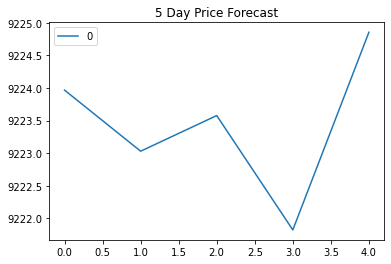

In [20]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=5)[0]).plot(title = "5 Day Price Forecast")

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [44]:
from arch import arch_model

In [52]:
df.loc['Return'] = df['Settle'].pct_change() * 100
df = df.dropna()
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2019-10-09 00:00:00,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601
2019-10-10 00:00:00,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458
2019-10-11 00:00:00,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304
2019-10-14 00:00:00,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335
2019-10-15 00:00:00,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509


In [55]:
# Estimate a GARCH model:
model = arch_model(df, mean="Zero", vol="GARCH", p=2, q=1)


ValueError: y must be squeezable to 1 dimension

In [56]:
# Fit the model
res = model.fit(disp="off")

NameError: name 'model' is not defined

In [57]:
# Summarize the model results
res.summary()

NameError: name 'res' is not defined

In [40]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

NameError: name 'returns' is not defined

In [ ]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
forecasts = res.forecast(start='2019-10-15', horizon=forecast_horizon, reindex=True)
forecasts

In [ ]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

In [ ]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

In [ ]:
# Plot the final forecast
final.plot()

---

# Conclusions

Based on your time series analysis, would you buy the yen now?

Is the risk of the yen expected to increase or decrease?

Based on the model evaluation, would you feel confident in using these models for trading?